In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation



## Read Sami Trop Data 

In [4]:
df = pd.read_csv("../data/Sami-Trop.csv")
df.head(10)

,exam_id,age,is_male,normal_ecg,death,timey,nn_predicted_age
0,294669,67,True,False,False,2.116020,51.093110
1,291318,65,True,False,False,3.077345,76.923935
2,247007,67,False,False,False,2.378450,61.212074
3,181629,34,False,False,False,2.676793,56.736490
4,250434,52,False,False,False,2.118782,71.822754
5,253698,67,False,False,False,2.071821,74.282010
6,253958,76,False,True,False,2.071821,87.866250
7,406936,75,False,False,False,2.080108,83.031970
8,250492,69,False,False,False,2.080108,54.031060
9,253803,53,False,True,False,2.071821,58.985962


#### Check Types 

In [5]:
df.dtypes

exam_id               int64
age                   int64
is_male                bool
normal_ecg             bool
death                  bool
timey               float64
nn_predicted_age    float64
dtype: object

In [6]:
df.shape

(1631, 7)

In [ ]:
## check for duplicate rows 

duplicate_rows = df[df.duplicated()]
print("Duplicate Shape:", duplicate_rows.shape)

## looks like no duplicate rows 

Duplicate Shape: (0, 7)


In [ ]:
## lets get the count and check for missing columns 

df.count()
## all here 

exam_id             1631
age                 1631
is_male             1631
normal_ecg          1631
death               1631
timey               1631
nn_predicted_age    1631
dtype: int64

### Creating simple graphs 

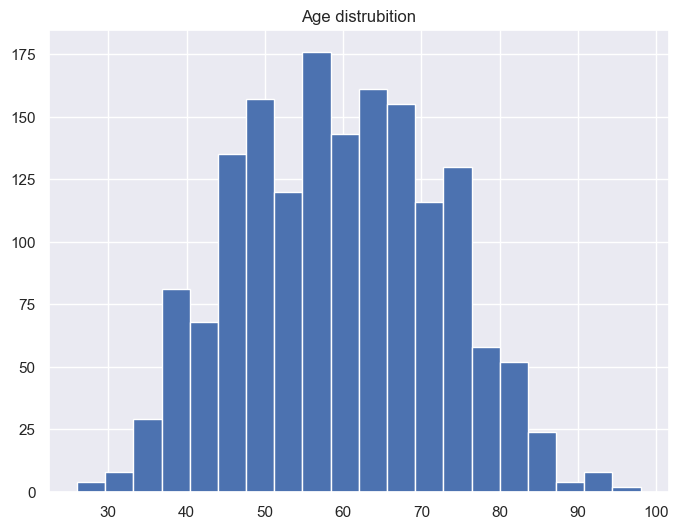

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df["age"], bins=20)
plt.title("Age distrubition")
plt.show()

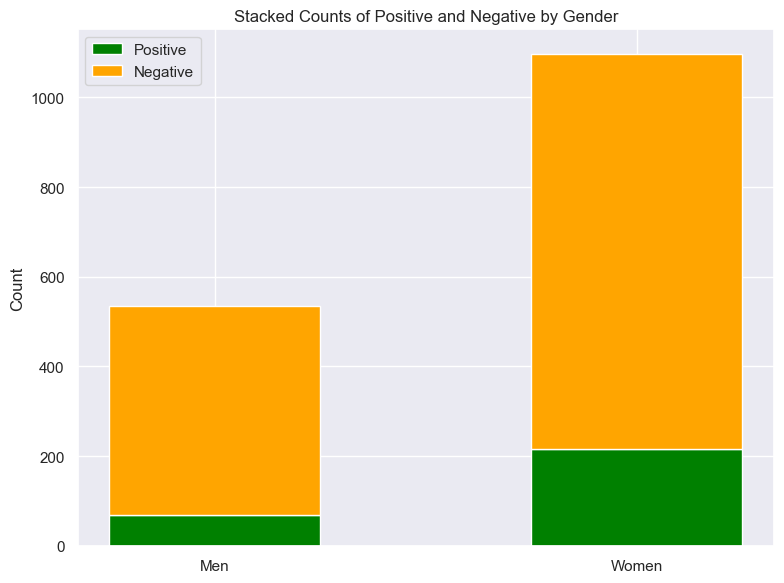

In [18]:
## Men v Woman 

x = np.arange(len(df["is_male"]))
bar_width = 0.5 

grouped = df.groupby(['is_male', 'normal_ecg']).size().unstack(fill_value=0)
for val in [True, False]:
    if val not in grouped.columns:
        grouped[val] = 0

# Prepare data
men_positive = grouped.loc[True, True] if True in grouped.index else 0
men_negative = grouped.loc[True, False] if True in grouped.index else 0
women_positive = grouped.loc[False, True] if False in grouped.index else 0
women_negative = grouped.loc[False, False] if False in grouped.index else 0

labels = ['Men', 'Women']
positives = [men_positive, women_positive]
negatives = [men_negative, women_negative]

x = range(len(labels))
bar_width = 0.5

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, positives, bar_width, label='Positive', color='green')
ax.bar(x, negatives, bar_width, bottom=positives, label='Negative', color='orange')

# Labeling
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Stacked Counts of Positive and Negative by Gender')
ax.legend()

plt.tight_layout()
plt.show()